1 meteostat.net
получить погоду за указанный пользователем период времени в Москве
а) получить данные с сервера

в) составить датафрейм с погодами за указанный период
дата, мин, макс, сред

г) составить данные по месяцам
мин - min
макс - max
сред - mean

д) составить среднюю температуру с промежутком с 30 минут, заполнив пробелы методом linear или cubic или каким-то другим
и построить на графике за какой-то один день, выбранный пользователем

In [102]:
import numpy as np
import pandas as pd
import datetime as dt
import get_weather
import ipywidgets as ipw
from matplotlib import pyplot as plt

In [287]:
def weather(date_start, date_end, date_detailed):
    
    dates, temps = get_weather.get_weather_data(date_start, date_end)
    temps_df = pd.DataFrame({'t_min': temps[:, 0], 't_max': temps[:, 1], 't_avg': temps[:, 2]}, index=pd.to_datetime(dates))
    
    temp_months = temps_df.resample('MS').agg(
        {
            't_min': np.min,
            't_max': np.max,
            't_avg': np.mean
        })
    
    plt.subplot(211)
    temps_df['t_min'].plot(grid=True, figsize=(10, 5), fontsize=8)
    temps_df['t_max'].plot(grid=True, color='red')
    plt.legend(['Мин температура', 'Макс температура'])
    
    plt.subplot(223)
    temp_months['t_avg'].plot(grid=True)
    plt.legend(['Среднемесячная температура'])
    
    
    if temps_df.index.min() < pd.to_datetime(date_detailed) < temps_df.index.max():
        temps_detaled = temps_df['t_avg'].resample('30min').interpolate(method='cubic')
        plt.subplot(224)
        temps_detaled.loc[str(date_detailed)].plot(grid=True)
        plt.legend([f'Средняя температура {date_detailed} '])
    else:
        print('Нет данных')

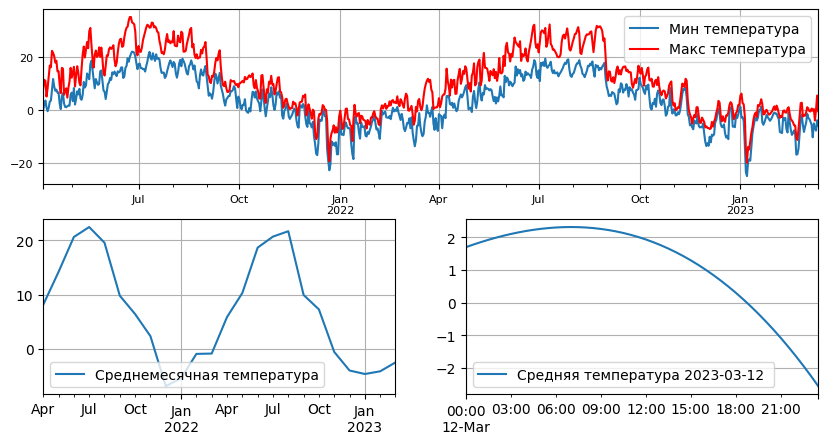

In [288]:
weather(date_start, date_end, date_detailed)

In [297]:
date_picker_start = ipw.DatePicker(description = 'date start:', value=dt.date(2019, 1, 1))


In [298]:
date_picker_end = ipw.DatePicker(description='date end:', value=dt.date.today() - dt.timedelta(days=1))

In [299]:
date_picker = ipw.DatePicker(description= 'day detailed',
                            value = dt.date.today() - dt.timedelta(days=2))

In [300]:
ipw.interact(weather,
             date_start = date_picker_start,
             date_end = date_picker_end, 
             date_detailed = date_picker)

interactive(children=(DatePicker(value=datetime.date(2019, 1, 1), description='date start:', step=1), DatePick…

<function __main__.weather(date_start, date_end, date_detailed)>